<a href="https://colab.research.google.com/github/2015pushkar/Demo/blob/main/July_19th_Project_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array

#clients =  50
#packets =  100
#phases in each iter =  [4 3 4 6 3 3 3 2 2 2 3 4 3 2 2 2 3 3 4 3 3 3 5 3 5 3 2 3 6 5 5 3 4 5 5 5 2
 4 3 3 3 4 3 3 4 4 2 6 4 3 4 3 2 5 3 3 2 2 3 4 3 3 5 3 3 3 3 3 2 3 2 3 3 3
 3 3 3 3 2 3 3 3 2 2 2 7 4 3 4 3 3 5 4 3 3 3 3 4 2 2 3 4 4 2 3 4 4 4 2 3 2
 3 3 3 5 3 5 3 4 4 4 2 3 4 5 2 3 4 3 3 3 3 3 3 4 5 3 2 3 3 2 4 3 2 5 3 5 3
 3 4 3 4 3 3 4 6 2 3 3 2 5 2 2 3 3 3 3 4 7 3 3 4 5 4 3 2 2 3 3 2 4 6 3 3 4
 3 3 3 3 4 3 4 3 3 3 4 3 3 3 3]
outer Iterations =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
for t =  1 . Avg #phases =  3.315
 
#clients =  100
#packets =  100
#phases in each iter =  [4 3 3 3 3 3 3 4 4 

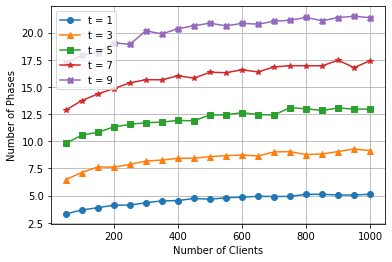

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array

out0 = 5                  # for out0 number of different values of t
out1 = 20                  # for each value of t, vary number of clients ,i.e out1 number of times
out2 = 200                 # for each value of out1, find #ofPhases out2 number of times and average it
mat = np.random.normal(0,0.000000000000000001,[out0,out1])   #(we need this for plotting) 
                                        #mat[i][j] for ith 't' value and jth 'number of clients', mat[i][j] = number of phases
for varyingT in range(0,out0):     #outermost loop for varying "t" 
  t = 1 + (varyingT *2)             # in this case "t" takes [1,3,5,7,9]
  var_nocp = np.random.randint(0,1,out1)   #initialized to zero array. for one value of "t" #ofPhases for differnt #ofClients
  for varNoc in range(0,out1):       # second loop, once "t" is fixed, vary #ofClients 
    varr = np.random.randint(0,1,out2)      
    vOutIter = np.random.randint(0,1,out2)   
    for clients_N_times in range(0,out2):     #to get one value of #Ofphases for given t and #ofClients ,run #out2 times and average it 
      noc = 50*(varNoc+1)         # number of clients
      nop = 100          # number of packets
      pac_len = 2         # number of bits in a packet
      P = np.random.randint(0,2,[nop,pac_len])        # generate "nop" number of random packets
      C = np.random.randint(0,1,[noc,nop,pac_len])     # All Clients initialization  3-D array [#ofClients * #ofPackets * pac_len]
      side_info = np.random.normal(0.5,0.2,(noc,nop))<=0.545        # side information matrix
      matrix = []
      row = []            #thresholding side_info_matrix
      for i in range(len(side_info)):    
        for j in side_info[i]:
        # print(int(j))
          row.append(int(j))
        matrix.append(array(row))
        row = []
      side_info = array(matrix)
      for i in range(0,noc):                     # Loop through each row of Side_info_Matrix (clients)
          for j in range(0,nop):                 # Loop through each column of Side_info_Matrix (packets)
              if(side_info[i][j] == 0):          # check for packets' existence in Side_info_Matrix 
                  C[i,j,:] = P[j,:]              #(if side_info[i][j] == 0) then client i has packet j
                                                # update the clients matrix 

      side_info_var = side_info.copy()
      C1 = C.copy()                             # Deep copying
      for i in range(0,noc):                    # Loop through each row of Side_info_Matrix (clients)
        for j in range(0,nop):                 # Loop through each column of Side_info_Matrix (packets)
          if(side_info[i][j] == 0):            # check for packets' existence in Side_info_Matrix
              C1[i,j,:] = 1 - 2*C1[i,j,:]       # Get the BPSK version of the clients matrix

      if noc % 2 == 0:                # Check wheter number of clients are even
        noc1 = noc
      else:
        noc1 = noc - 1                # Check wheter number of clients are odd
      def randomPacketsSelection(side_info_asa_par,c2i1,c2i):    #In part1, phase1 of FCU ,we need 1 packet from each clients and
        Ind = np.random.randint(0,1,[noc,nop])                   # also we need 2 packets from those two clients which are grouped
        for i in range(0,noc):                                   # and their packets are supposed to be sent to relay in any Kth phase
          for j in range(0,nop):                                 # this function returns an array of length equal to number of clients 
            if (side_info_asa_par[i][j] == 0):                   # and each entry tells which packet should be selected from each client  
              Ind[i][j] = j                                      # in order  
            else:
              Ind[i][j] = -1
        
        ranArr = np.random.randint(0,1,noc)

        arrTry1 = np.random.randint(0,1,nop)                    # among the packets of client c2i1(odd client) see which packet is being
        for pac in range (0,nop) :                              # more demanding
          arrTry1[pac] = sum(side_info_asa_par[:,pac])
          if Ind[c2i1][pac] == -1:
            arrTry1[pac] = 0
        maximum = np.max(arrTry1)
        ind1 = np.where(arrTry1 == maximum)
        val1 = np.array(ind1)
        
        arrTry2 = np.random.randint(0,1,nop)                   # among the packets of client c2i(even client) see which packet is being
        for pac in range (0,nop) :                             # more demanding
          arrTry1[pac] = sum(side_info_asa_par[:,pac])
          if (Ind[c2i][pac] == -1 or pac == val1[0,0]):
            arrTry2[pac] = 0
        maximum = np.max(arrTry2)
        ind2 = np.where(arrTry2 == maximum)
        val2 = np.array(ind2)

        ranArr[c2i1] = val1[0,0]
        ranArr[c2i] = val2[0,0]
      
        for cli in range(0,noc):
          if (cli != c2i1 or cli != c2i):
            randPos = np.random.randint(0,nop)
            while (Ind[cli][randPos] == -1):
              randPos = np.random.randint(0,nop)
            ranArr[cli] = Ind[cli][randPos]
        return ranArr                                     

      def satisfactionCheck(side_info_asa_par):              # this function takes input as the updated side_info_matrix
        check = 0                                            # check if whether all clients have received atleast t number 
        rowCount = 0                                         # of new packets, if this condition is met,return true else false
        for cli in range(0,noc):
          if (sum(side_info[cli]) <= t):
            check = check + 1
          if ( sum(side_info[cli]) - sum(side_info_asa_par[cli]) ) >= t:  # Demanding atleast t new packets case
            rowCount = rowCount + 1

        if rowCount == noc - check:
          return True
        else:
          return False

      v = 0
      outIter = 0
      while satisfactionCheck(side_info_var) == False:         #keep repeating floor[N/2]phases until the demands are met i.e above  
        outIter = outIter + 1                                  #function returning true.
        for c1,c2 in zip(range(0,noc1,2),range(1,noc1,2)):     # Access two clients at a time sequentially
          if satisfactionCheck(side_info_var) == True:
            break
          RPSA = randomPacketsSelection(side_info_var,c1,c2)
          v = v + 1
            
          for bit in range(0,pac_len):                         # Then Loop through each bit packet
            SUM = 0                                            # Part 1 Phase 1  FCU sum initialized to zero
            maj = 0                                            # Part 1 Phase 2 Decision symbol initialized to zero
            symb1 = 0                                          # Part 2 Phase K , Table 1 result initialized to zero (odd client)
            symb2 = 0                                          # Part 2 Phase K , Table 1 result initialized to zero (even client)                        
            for p1p1,RPSAind in zip(range(0,noc),range(0,noc)):   # Loop through all clients selected packets' "bit"th symbol 
              SUM = SUM + C1[p1p1,RPSA[RPSAind],bit]                    # Find the sum

            if (SUM > 0):
              maj = 1                                          # Find out the majority symbol 
            else:
              maj = -1

            if (C1[c1,RPSA[c1],bit] == maj):                         # Apply Table 1 on the "bit"th 
              symb1 = 1                                        # bits' of two 
            else:                                              # clients that are 
              symb1 = -1                                       # being accessed 
            if (C1[c2,RPSA[c2],bit] == maj):                         # in the outer loop
              symb2 = 0
            else:
              symb2 = -1 

            if ((symb1 + symb2) == 1):                        # Table 2 implementation  
              val1 = maj
              val2 = maj
            if ((symb1 + symb2) == -1):
              val1 = -1*maj
              val2 = maj
            if ((symb1 + symb2) == 0):
              val1 = maj
              val2 = -1*maj
            if ((symb1 + symb2) == -2):
              val1 = -1*maj
              val2 = -1*maj

            for rep in range(0,noc):                          # Updating client matrix database
              if rep != c1:
                C1[rep,RPSA[c1],bit] = val1
              if rep != c2:
                C1[rep,RPSA[c2],bit] = val2

          for clients in range(0,noc):
            side_info_var[clients][RPSA[c1]] = 0
            side_info_var[clients][RPSA[c2]] = 0


      varr[clients_N_times] = v
      vOutIter[clients_N_times] = outIter
    avg = sum(varr)/out2
    mat[varyingT][varNoc] = avg
    print("#clients = ",noc)
    print("#packets = ",nop)
    print("#phases in each iter = ",varr)
    print("outer Iterations = ",vOutIter)
    print("for t = ",t,". Avg #phases = ",avg)
    print(" ")

    var_nocp[varNoc] = avg
  print(var_nocp)
print(mat)



# create data
x = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

# plot lines
plt.plot(x, mat[0,:],marker = 'o', label = "t = 1")
plt.plot(x, mat[1,:],marker = '^', label = "t = 3")
plt.plot(x, mat[2,:],marker = 's', label = "t = 5")
plt.plot(x, mat[3,:],marker = '*', label = "t = 7")
plt.plot(x, mat[4,:],marker = 'X', label = "t = 9")
plt.xlabel('Number of Clients')
plt.ylabel('Number of Phases')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
mat = [[ 3.315,  3.675,  3.89,   4.11,   4.13,   4.34,   4.515,  4.54,   4.735,  4.665,
   4.8,    4.855,  4.935,  4.915,  4.93,   5.12,   5.125,  5.05,   5.05,   5.13],
 [ 6.475,  7.12,   7.64,   7.61,   7.87,   8.175,  8.27,   8.43,   8.44,   8.585,
   8.68,   8.73,   8.65,   9.02,   9.045,  8.775,  8.83,   9.05,   9.29,   9.135],
 [ 9.805, 10.56,  10.82,  11.32,  11.555, 11.705, 11.765, 11.915, 11.88,  12.42,
  12.425, 12.63,  12.45,  12.415, 13.09,  12.99,  12.83,  13.065, 12.95,  12.955],
 [12.865, 13.745, 14.35,  14.85,  15.365, 15.665, 15.65,  16.025, 15.805, 16.345,
  16.31,  16.57,  16.38,  16.84,  16.95,  16.95,  16.935, 17.4, 17.401,  17.415],
 [17.23,  17.895, 18.15,  19.055, 19.915, 20,  19.975, 20.355, 20.625, 20.86,
  20.615, 20.845, 20.77,  21.04,  21.13,  21.395, 21.085, 21.375, 21.5,   21.365]]

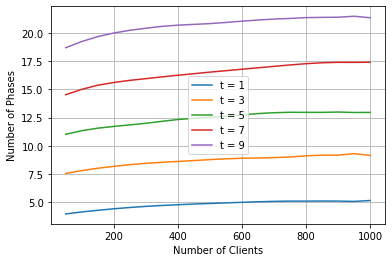

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
copymat = np.random.normal(0,0.000000000000000000001,[5,20]) 
for i in range(0,5):
 for j in range(0,20):
  if j<=17:
    copymat[i][j] = (mat[i][j]+mat[i][j+1]+mat[i][j+2])/3
  else:
    copymat[i][j] = mat[i][j]
# create data
x1 = np.random.randint(0,1,20)
for i in range(0,20):
 x1[i] = 50*(i+1)
 
# plot lines
# plt.plot(x1, copymat[0,:], label = "t = 1")
# plt.plot(x1, copymat[1,:], label = "t = 3")
# plt.plot(x1, copymat[2,:], label = "t = 5")
# plt.plot(x1, copymat[3,:], label = "t = 7")
# plt.plot(x1, copymat[4,:], label = "t = 9")
# plt.xlabel('Number of Clients')
# plt.ylabel('Number of Phases')
# plt.legend()
# plt.grid(True)
# plt.show()
copymat2 = np.random.normal(0,0.000000000000000000001,[5,20]) 
for i in range(0,5):
 for j in range(0,20):
  if j<=16:
    copymat2[i][j] = (copymat[i,j]+copymat[i,j+1]+copymat[i,j+2]+copymat[i,j+3])/4
  else:
    copymat2[i][j] = copymat[i,j]
 
# create data
x1 = np.random.randint(0,1,20)
for i in range(0,20):
 x1[i] = 50*(i+1)
 
# plot lines
plt.plot(x1, copymat2[0,:], label = "t = 1")
plt.plot(x1, copymat2[1,:], label = "t = 3")
plt.plot(x1, copymat2[2,:], label = "t = 5")
plt.plot(x1, copymat2[3,:], label = "t = 7")
plt.plot(x1, copymat2[4,:], label = "t = 9")
plt.xlabel('Number of Clients')
plt.ylabel('Number of Phases')
plt.legend()
plt.grid(True)
plt.show()